In [42]:
#importing necessary libraries

#Beautiful Soup will help us read the Html document
from bs4 import BeautifulSoup as soup
#allows you to send HTTP requests
from requests import get
import requests
import re
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#requesting data from url
response = requests.get("https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city")
response

<Response [200]>

In [3]:
response.text[:100] #returns the first 2000 characters

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=ut'

In [4]:
data= soup(response.text)
house_containers = data.find_all("li",class_= "cardholder")
first = house_containers[0]
x = first.find_all('td', class_ = 'price')[0].text
x

' 1.03 Cr'

In [5]:
#creating empty list for appending the extracted value
title = []
location = []
price = []
price_per_sqft = []
area_in_sqft = []
building_status = []

In [6]:
%%time
n_pages = 0
for page in range(3,10): #the no. of pages to be extracted considering the pages available in the url
    n_pages +=1
    url = 'https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?'+'&page='+str(page)
    
    # this for gets uns into next page after every iteration.
    r = requests.get(url) #here r is response data
    page_html = soup(r.text, 'html.parser')
    house_containers = page_html.find_all('li', class_ = 'cardholder')# class containing overall data of a property
    
    ##### title
    for data in house_containers:
        type_ = data.find_all("a", class_="typelink") 
        for i in type_:
            d = i.text
            title.append(d)
            
    ########Location 
        location_ = data.find_all("a", class_ = "loclink")
        for i in location_:
            d = i.text
            r= d.split(',',)[0]#splitting the obtained text and returning the first element of text
            location.append(r)
            
            
    ##########price
        cost = data.find_all("td", class_ = "price")
        for i in cost:
            d= i.text
            if 'L' in d:
                a = d.split()[0]
                price.append(float(a))
            elif 'Cr' in d:
                b = d.split()[0]
                price.append(float(b)*100)
            else:
                e = 0
                price.append(float(e))
                
    ####### price per sqft
    
        rate_sqft = data.find_all('td', class_="lbl rate")
        for i in rate_sqft:
            d = i.text
            res = d.split('/',)[0]
            r = re.sub(",","",res)
            price_per_sqft.append(r)
            
    ############################   AREA IN SQFT    ####################################

        area_sqft=data.find_all('td',class_="size")
        for i in area_sqft:
            d=i.text
            area_in_sqft.append(d)
            
##########################   BUILDING STATUS    ###################################

        building_status_=data.find_all("td",class_="val")
        for i in building_status_:
            d=i.text
            building_status.append(d)

###################################################################################

print('You scraped {} pages containing {} properties.'.format(n_pages, len(title)))
# Returns the number of pages scrapped and time taken for scarpping those pages.

You scraped 7 pages containing 140 properties.
Wall time: 3.81 s


In [7]:
df = pd.DataFrame()

In [8]:
df['title']=title 
df['location']=location
df['price(L)']=price
df['rate_persqft']=price_per_sqft
df['area_insqft']=area_in_sqft
df['building_status']=building_status

In [9]:
df.head()
df.shape

(140, 6)

In [10]:
df.to_csv('projectfinal.csv')

In [11]:
df=pd.read_csv('projectfinal.csv')

In [12]:
# Dropping of the unnecessary column "Unnamed: 0".

df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [13]:
df.describe()

,price(L),rate_persqft,area_insqft
count,140.000000,140.000000,140.000000
mean,85.060214,4142.335714,2060.192857
std,59.673168,1709.143416,1127.561250
min,6.000000,368.000000,200.000000
25%,45.797500,3399.750000,1403.000000
50%,74.790000,4497.500000,1726.500000
75%,107.250000,5100.000000,2462.500000
max,400.000000,8888.000000,9000.000000


In [14]:
# Drops the duplicate entires in the dataset.

df=df.drop_duplicates()

In [15]:

# As number of rows would vary we need to reset index.

df=df.reset_index()

In [16]:
# Dropping unnecessary columns in dataset.

df=df.drop(labels='index',axis=1)

In [17]:
df.shape

(140, 6)

In [18]:
df.head()

,title,location,price(L),rate_persqft,area_insqft,building_status
0,Residential Plot,Gachibowli,200.00,5555,3600,New
1,2 BHK Apartment,Bachupally,38.00,3368,1128,Ready to move
2,Residential Plot,Yadagirigutta,24.50,778,3150,New
3,2 BHK Apartment,Kukatpally,56.79,4960,1145,Ready to move
4,2 BHK Apartment,Raviryal,25.00,1785,1400,Under Construction


In [19]:
df.tail()

,title,location,price(L),rate_persqft,area_insqft,building_status
135,2 BHK Apartment,Adibatla,41.79,3803,1100,Under Construction
136,Residential Plot,Alair,18.39,511,3600,New
137,Residential Plot,Alair,9.19,511,1800,New
138,Residential Plot,Alair,7.35,511,1440,New
139,Residential Plot,Alair,13.79,511,2700,New


In [20]:
#group by and count the number of appertiment per location, average price, mode price, average rate per square ft.
#aggregating per title
agg_df = df.groupby('title').agg({'price(L)':['count','mean','max','min'],
                                 'rate_persqft':['mean','max','min'],
                                 'area_insqft':['mean','max','min']})

In [21]:
#agg_title_df = df.groupby('title').agg(average_price=('price(L)', 'mean'), average_area=('area_insqft', 'mean'),)

In [22]:
agg_df.columns = ["_".join(x) for x in agg_df.columns.ravel()]
agg_df= agg_df.reset_index()

In [23]:
agg_df.columns

Index(['title', 'price(L)_count', 'price(L)_mean', 'price(L)_max',
       'price(L)_min', 'rate_persqft_mean', 'rate_persqft_max',
       'rate_persqft_min', 'area_insqft_mean', 'area_insqft_max',
       'area_insqft_min'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

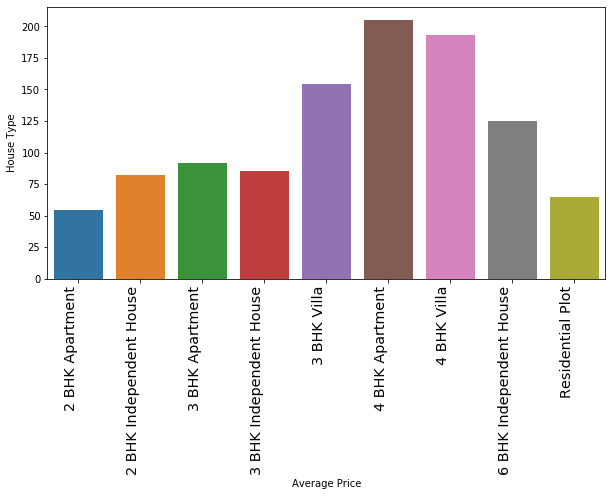

In [29]:


plt.figure(figsize=(10,5))
#sns.set(style="whitegrid")
ax = sns.barplot(x="title", y="price(L)_mean", data=agg_df)
ax.set(xlabel='Average Price', ylabel='House Type')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [25]:
#aggregating per location
agg_location_df = df.groupby('location').agg({'price(L)':['count','mean','max','min'],
                                 'rate_persqft':['mean','max','min'],
                                 'area_insqft':['mean','max','min']})

In [32]:
##vizualizing only the title
df_title = df['title'].value_counts()
df_title

3 BHK Apartment            48
Residential Plot           44
2 BHK Apartment            28
3 BHK Villa                10
4 BHK Apartment             4
4 BHK Villa                 2
2 BHK Independent House     2
3 BHK Independent House     1
6 BHK Independent House     1
Name: title, dtype: int64

Now let’s visualize every column we have

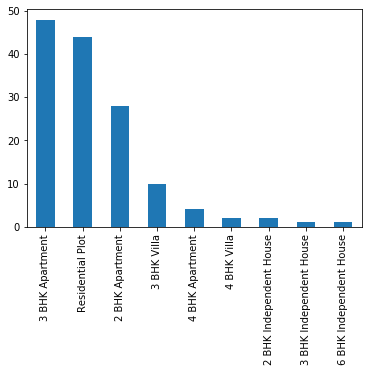

In [35]:
#plotting a bar plot on count
df_title.plot.bar()
#plt.yscale('log')

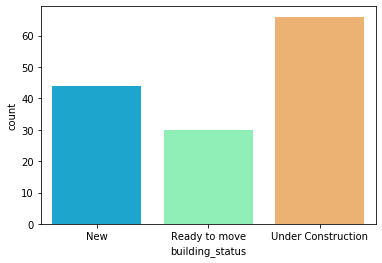

In [37]:
#plot on building status
sns.countplot(x = 'building_status', data = df, palette ='rainbow')

The above plot depicts that there 3 categories in building_status which are New properties to be almost 45, Under construction properties to be almost 65, and Ready to move properties to be 30. 

In [39]:
#comparing 3BK and 2Bk properties only
df_=df[(df['title']=='2 BHK Apartment')| (df['title']=='3 BHK Apartment')]
df_.shape

(76, 6)

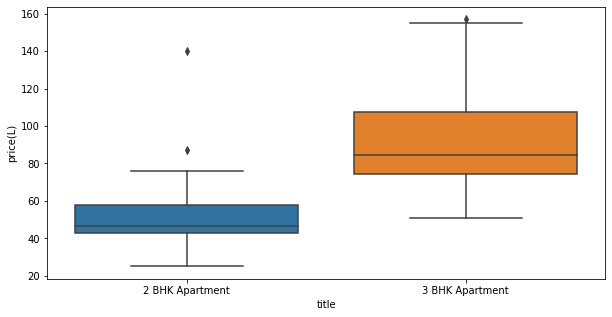

In [41]:
##
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(y = 'price(L)', x = 'title', data = df_ , ax = ax)